# Medical Cost Personal Insurance Project
## Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
## Columns  

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance





### Predict : Can you accurately predict insurance costs?

## Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


### Importing important libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Understanding the data

In [6]:
insurance = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Internship\\Practice Projects\\First Phase\\Medical_cost_insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# checking missing values
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- There are no missing values

By looking at our dataset we see that columns — ‘sex’, ‘smoker’ and ‘region’ are in string format, so we can work on converting them to numerical values as below

In [8]:
# Replacing string values to numbers
insurance['sex'] = insurance['sex'].apply({'male':0,      'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [9]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


## Exploratory Data Analysis

Let’s create some simple plots to check out the data.

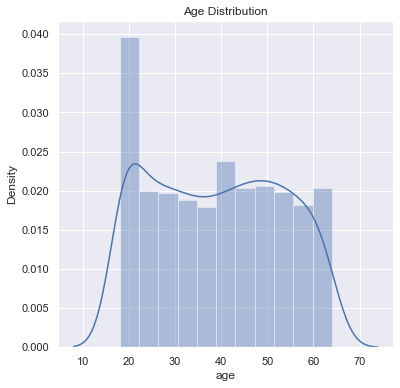

In [15]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['age'])
plt.title('Age Distribution')
plt.show()

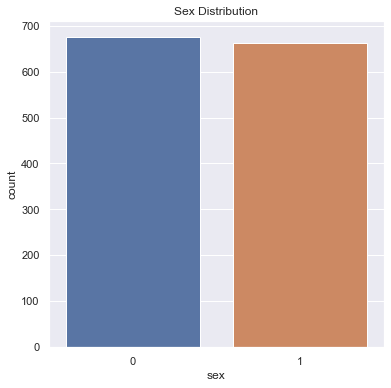

In [12]:
# countplot for gender column (categorical column)
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance)
plt.title('Sex Distribution')
plt.show()

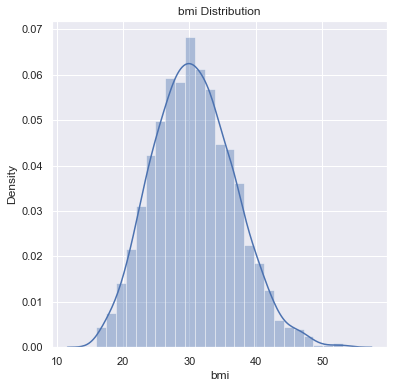

In [16]:
# bmi distribution in dataset
plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi'])
plt.title('bmi Distribution')
plt.show()

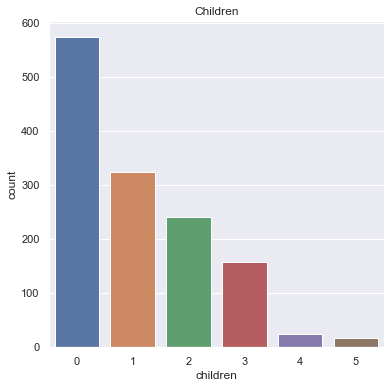

In [17]:
# countplot for children column 
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance)
plt.title('Children')
plt.show()

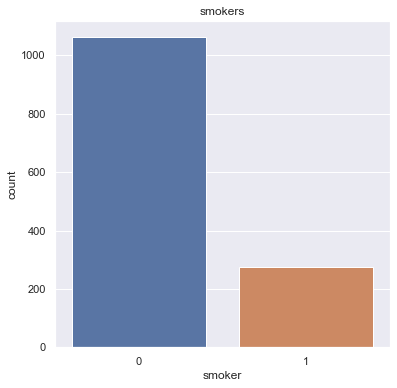

In [18]:
# smokercolumn 
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance)
plt.title('smokers')
plt.show()

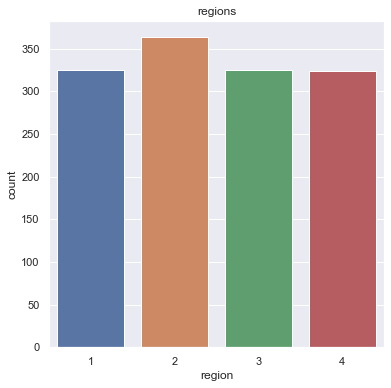

In [19]:
# rego=ion column 
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance)
plt.title('regions')
plt.show()

In [20]:
insurance['region'].value_counts()

2    364
1    325
3    325
4    324
Name: region, dtype: int64

In [21]:
#{'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}

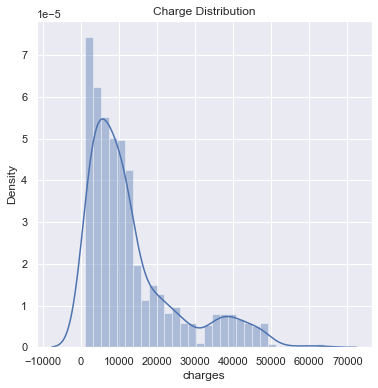

In [22]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.title('Charge Distribution')
plt.show()

-------

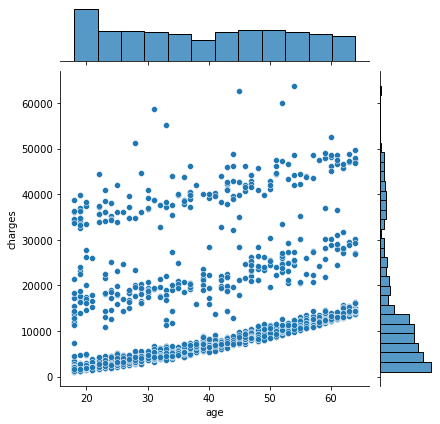

In [4]:
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=insurance['age'],y=insurance['charges'])

Here we see that as Age goes up Charges for health insurance also trends up

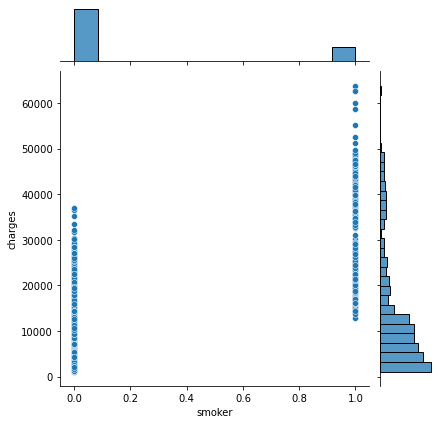

In [6]:
# Correlation betweeen 'charges' and 'smoker' 
sns.jointplot(x=insurance['smoker'],y=insurance['charges'])

Here we see that charges for smokers are higher than non-smokers

# Data Pre-processing

### Training a Linear Regression Model
Let’s now begin to train our regression model by following below steps

#### Step 1: First we will split our data into ‘X’ array that contains the features and a ‘y’ array with the target variable.

In [7]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [23]:
# features
X = insurance[['age', 'sex', 'bmi', 'children','smoker','region']]
# predicted variable
y = insurance['charges']

In [24]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [25]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

#### Step 2: Next we will split our dataset(insurance.csv) into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model(Predict ‘y’ variable). Please note that we will also compare the testing set predicted results with actual results.

In [69]:

# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 2)

In [71]:

#We can quickly check the number of records for both training dataset and testing dataset
print(len(X))
print(len(X_test)) 
print(len(X_train)) 
print(len(insurance)) 

1338
268
1070
1338


#### Step 3: Train and Test the model

Now that we have a train and test datasets, we can evaluate the model using Linear regression as below

In [72]:
# importing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit linear model by passing training dataset
model.fit(X_train,y_train)

LinearRegression()

#### Step 4: Predictions from our model

In [73]:
# Predicting the target variable for test datset
y_train_pred = model.predict(X_train)

#### Step 5: Comparing the results

Let’s compare these ‘prediction’ results with actual results by plotting a graph.

- We can calculate ‘Root Mean Squared Error’ to check the model performance using regression evaluation metrics to see the model behavior and decide which model best fits.

- Let’s just continue with our basics as of now and try to predict new customer’s insurance charges

In [74]:
# R squared value

from sklearn import metrics
r2_train = metrics.r2_score(y_train, y_train_pred)
print('R squared value: ', r2_train)

R squared value:  0.7519923667088932


In [75]:
y_test_pred = model.predict(X_test)

In [76]:
# R squared value

r2_test = metrics.r2_score(y_test, y_test_pred)
print('R squared value: ', r2_test)

R squared value:  0.7445422986536503


#### Step 6: Buildig a predictive system

In [ ]:
# Replacing string values to numbers
insurance['sex'] = insurance['sex'].apply({'male':0,      'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [82]:
input_data = (31,1,25.74,0,0,2)

In [83]:
# changing input data to a numpy array
input_data_as_np_array = np.asarray(input_data)

In [84]:
#reshape the array
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

In [85]:
input_data_reshaped

array([[31.  ,  1.  , 25.74,  0.  ,  0.  ,  2.  ]])

In [86]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[3911.4481614]


This value is close enough to the real value in dataset implying our model is working well.

## Conclusion

In this article, we have explored the basics of the linear regression model and applied it to predict charges and seen the correlation between predicted and actual results. 

## ******************* The End ***********************